In [1]:
######################################
###          DATA STORY            ###
######################################

In [2]:
### Imports ###
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as sstats

from pyechonest import config
from pyechonest import song
from pyechonest import artist

# Function used in this notebook
import dataStoryFunctions as dsf

In [3]:
### Main Code ###

In [4]:
# Set ECHO_NEST_API_KEY value
config.ECHO_NEST_API_KEY = "V2KYAQQLNXM5FEUUU"

In [5]:
# Define the starting and ending years 
start_year = 1960
end_year = 2014

In [6]:
# Create a list containing all the years we are interested in
years = dsf.create_years_list(start_year, end_year)

In [7]:
# Creation of the global dataframe
billboard_df = dsf.create_billboard_df_from_CSV(start_year, years)

In [8]:
#billboard_df.head()
#billboard_df.tail()

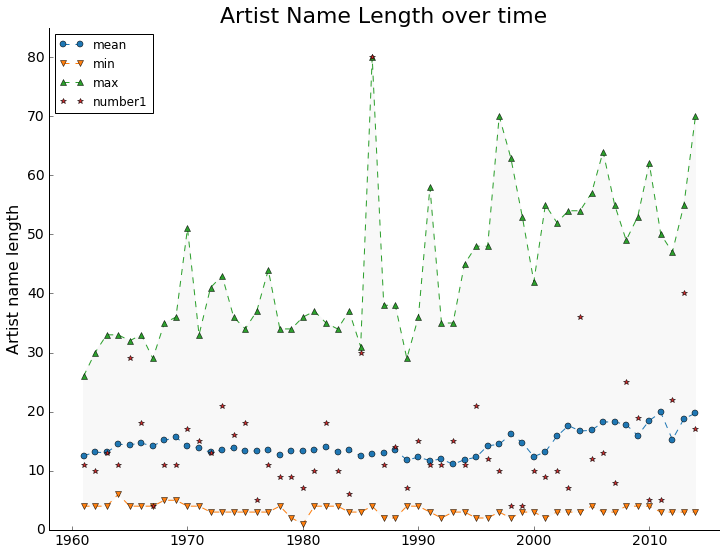

In [9]:
# Plot the Artist Name Length vs the year
dsf.create_name_length_plot('Artist(s)', billboard_df, years, start_year, end_year,
                     "Artist name length", "Artist Name Length over time",
                 "Images/Artist-name-length-over-time.png", 2) 

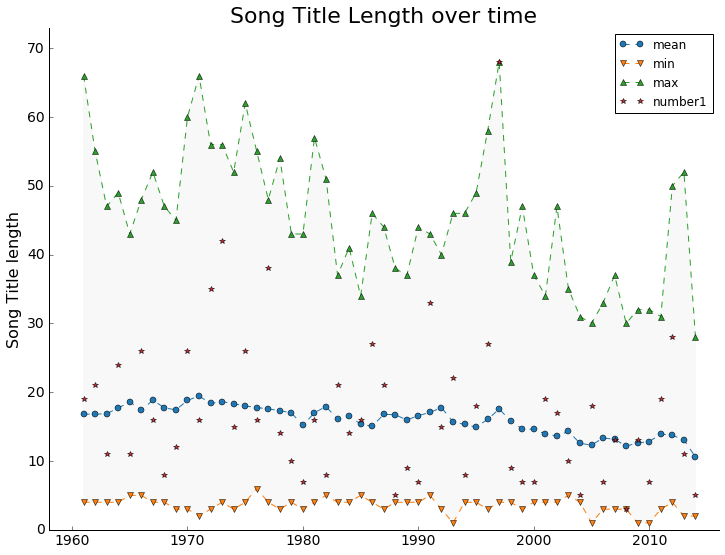

In [10]:
# Plot the Song Title Length vs the year
dsf.create_name_length_plot('Title', billboard_df, years, start_year, end_year,
                     "Song Title length", "Song Title Length over time",
                 "Images/Song-title-length-over-time.png", 1) 

In [11]:
# Number of featurings over time

In [12]:
# Total number of songs
total_songs = billboard_df['Title'].count()
print "Total songs:", total_songs
# 5501 songs because two numbers 100 in 1969

# Total number of featurings
billboard_df_featurings = billboard_df[billboard_df['Artist(s)'].str.contains("featuring")]
total_featurings = billboard_df_featurings['Title'].count()
print "Total featurings:", total_featurings

# Proportion of featurings
featuring_proportion = total_featurings / float(total_songs) * 100
print "Featuring proportion:", featuring_proportion, "%"

# Years where a featuring has been ranked #1
years_featuring_number1 = billboard_df_featurings[billboard_df_featurings['Num'] == 1]['Year']
print "Years where a featuring has been #1: ", years_featuring_number1.tolist()

Total songs: 5501
Total featurings: 520
Featuring proportion: 9.45282675877 %
Years where a featuring has been #1:  [1985, 1995, 2004, 2008, 2012, 2013]


In [14]:
# Creation of a new dataframe for the featuring number
billboard_df_featurings.loc[:,'Counts']  = billboard_df_featurings.groupby('Year')['Year'].transform('count')
billboard_df_featurings_count = pd.concat([billboard_df_featurings['Year'], 
                                           billboard_df_featurings['Counts']], axis=1,
                                          keys=['Year', 'Counts'])

billboard_df_featurings_count = billboard_df_featurings_count.groupby('Year').count().reset_index()


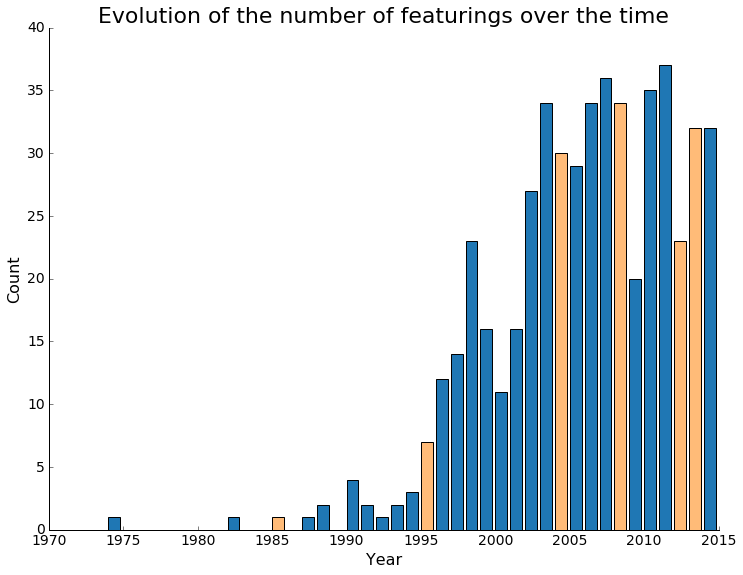

In [15]:
dsf.create_bar_chart_featurings(billboard_df_featurings_count['Year'], 
                            billboard_df_featurings_count['Counts'], 
                           "Year",
                           "Count",
                           "Evolution of the number of featurings over the time",
                           "Images/Featuring-number-over-time.png",
                               years_featuring_number1.tolist())

In [16]:
# Number of songs by artist in the Top 100

In [17]:
billboard_df_artist_count = dsf.create_entries_count_by_artist(billboard_df, start_year, end_year)
billboard_df_artist_count.head(10)

,Lead Artist(s),Counts
1244,Madonna,36
1252,Mariah Carey,29
1619,Rihanna,27
1885,The Beatles,26
636,Elton John,26
909,Janet Jackson,23
1316,Michael Jackson,22
1808,Stevie Wonder,22
2241,Whitney Houston,21
2197,Usher,20


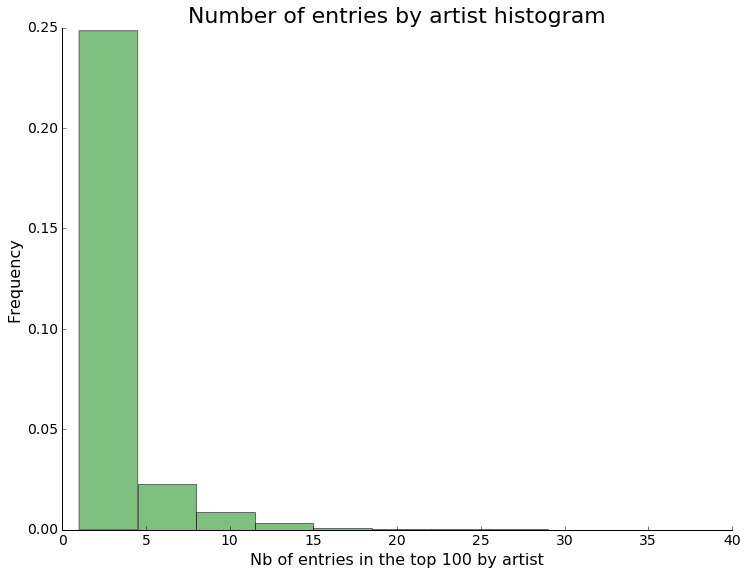

In [19]:
dsf.create_histogram_nb_entries(billboard_df_artist_count["Counts"], 
                            "Nb of entries in the top 100 by artist", 
                            "Frequency", 
                            "Number of entries by artist histogram", 
                            "Images/histogram_entries_by_artist.png")

In [20]:
cumulative_count_df = dsf.create_cumulative_counts_df(billboard_df_artist_count)

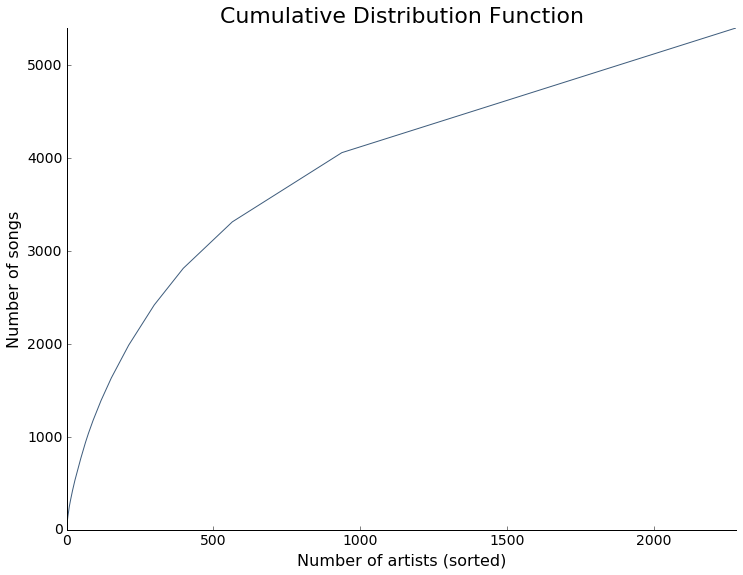

In [21]:
dsf.plot_cumulative_distribution_function(cumulative_count_df, 'Number of artists (sorted)',
                                         'Number of songs',
                                         'Cumulative Distribution Function',
                                         "Images/cdf_songs_x_artists.png")

In [22]:
cumulative_count_reverse_df = dsf.create_cumulative_counts_reverse_df(billboard_df_artist_count)

In [23]:
total_nb_songs = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].tolist()[0]
print "Total number of songs:", total_nb_songs

Total number of songs: 5401


In [24]:
total_nb_artists = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].index.tolist()[0]
print "Total number of artists:", total_nb_artists

Total number of artists: 2279


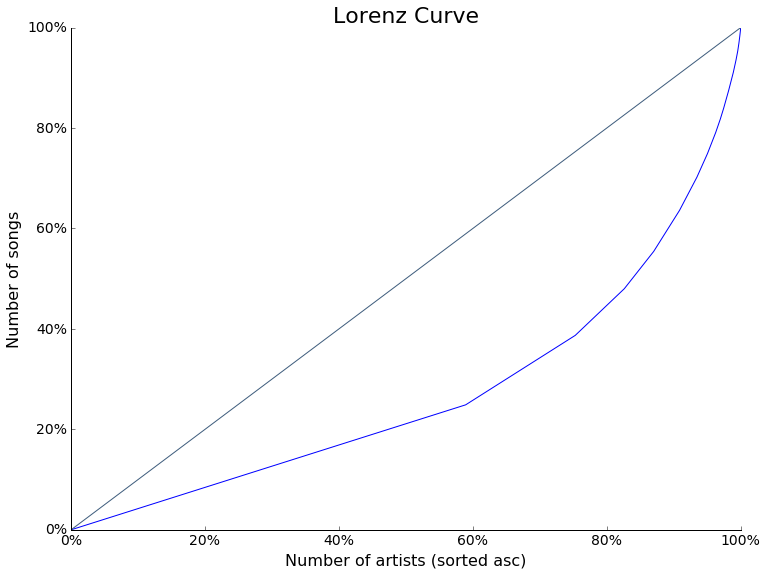

In [25]:
dsf.plot_lorenz_curve(cumulative_count_reverse_df, total_nb_songs, total_nb_artists,
                      "Number of artists (sorted asc)", 
                      "Number of songs", "Lorenz Curve",
                     "Images/lorenz_curve_full_dataset.png")

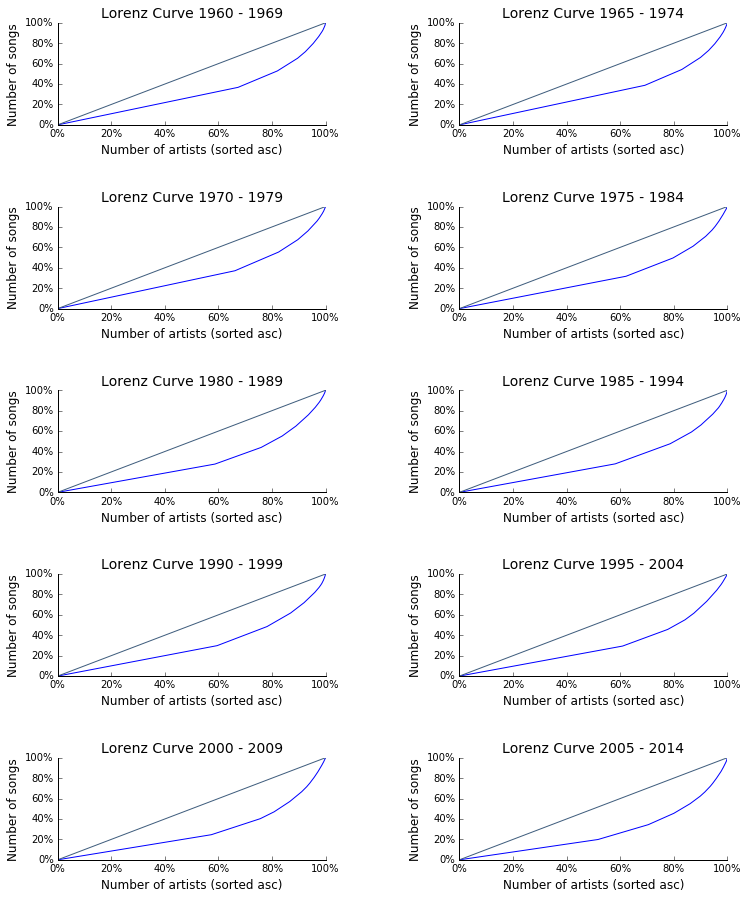

In [26]:
dsf.plot_multiple_lorenz_curves(billboard_df, start_year, end_year, 10, 5,
                                "Number of artists (sorted asc)",
                                "Number of songs", "Lorenz Curve",
                               "Images/lorenz_curves_multiple.png",
                               False)

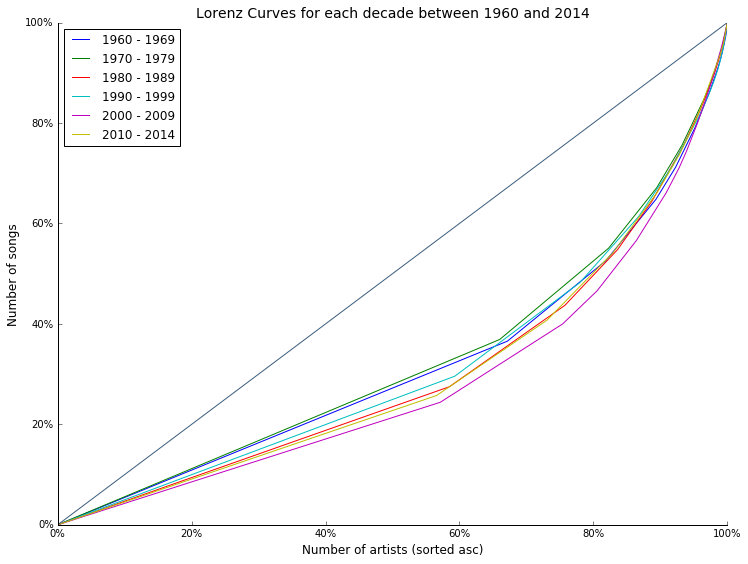

In [27]:
dsf.plot_multiple_lorenz_curves(billboard_df, start_year, end_year, 10, 10,
                                "Number of artists (sorted asc)",
                                "Number of songs", "Lorenz Curve",
                               "Images/lorenz_curves_multiple_subplot.png",
                               True)

In [28]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.pyc'>

In [29]:
### Gini coefficient ###

# The formula is the following:
#    G = (N+1) / (N-1) - (2 / (N * (N - 1) * u)) * Sum(Pi * Xi)(for i = 1 to n)

# Where G is the coefficient we’re after, N is the number of samples, u is the mean 
# of the values, and P and X are respectively the rank and the number of songs 
# of the ith artist, ranked such that the highest number of songs ranks 1,
# and the lowest ranks N; 
# this way, that the last term in the equation is a sum of the products of
# each number of songs by its rank

In [30]:
gini_global = dsf.calculate_gini_coefficient(billboard_df, start_year, end_year + 1)
gini_global

0.45424950005166387

In [31]:
gini = dsf.calculate_gini_coefficient(billboard_df, 2010, 2011)
gini

0.25641791044776141

In [32]:
gini_coefficient_df = dsf.calculte_gini_per_year(billboard_df, start_year, end_year + 1, 1)
gini_coefficient_df.head()

,Year(s),Gini Coefficient
0,1960,0.207733
1,1961,0.174359
2,1962,0.114651
3,1963,0.155750
4,1964,0.235278


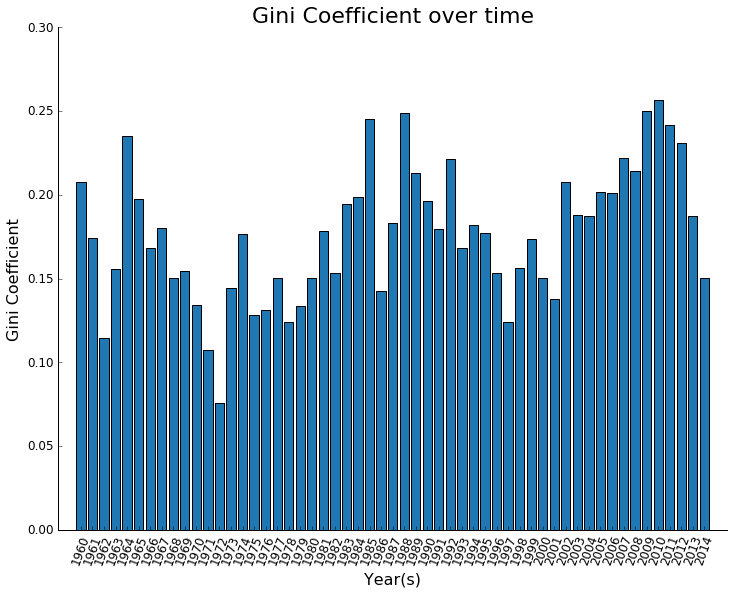

In [33]:
dsf.plot_gini_coefficient(gini_coefficient_df, "Year(s)",
                                "Gini Coefficient", "Gini Coefficient over time",
                               "Images/gini_coefficient_plot.png")

In [34]:
### EchoNest API ###

In [35]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.pyc'>

In [36]:
billboard_df_artist_count.head()

,Lead Artist(s),Counts
1244,Madonna,36
1252,Mariah Carey,29
1619,Rihanna,27
1885,The Beatles,26
636,Elton John,26


In [380]:
# This step takes a lot of time, that is why the output data frame is saved in a CSV file 
# to be able to use it directly after.
# The names printed are artists which are not present in the Echo Nest database
billboard_df_artist_count_with_additional_items = dsf.add_items_to_billboard_df_artist_count(billboard_df_artist_count, ["familiarity", "hotttnesss"])

The Time
Various artists
Original Cast of Godspell
Stevie Nicks & Tom Petty
The Jaynetts
Dottie West & Kenny Rogers
Lord David Dundas
Kenny Loggins & Stevie Nicks
Lil Jon & the East Side Boyz
Lil Jon & The East Side Boyz
Murray Head & The Trindad Singers
Neil Sedaka & Elton John
Neil Diamond & Barbra Streisand
Frank & Nancy Sinatra
Joan Jett & The Blackhearts


In [34]:
billboard_df_artist_count_with_additional_items.head()

NameError: name 'billboard_df_artist_count_with_additional_items' is not defined

In [440]:
billboard_df_artist_count_with_additional_items.to_csv('CSV_data/billboard_df_artist_count_with_additional_items.csv', sep=',') 

In [44]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.py'>

In [36]:
billboard_df.head()

,Num,Title,Artist(s),Year
0,1,Theme from A Summer Place,Percy Faith,1960
1,2,He'll Have to Go,Jim Reeves,1960
2,3,Cathy's Clown,The Everly Brothers,1960
3,4,Running Bear,Johnny Preston,1960
4,5,Teen Angel,Mark Dinning,1960


In [37]:
billboard_df_additional_data_dict = dsf.add_songs_characteristics_to_df(billboard_df)

1960
Artist name:  Dinah Washington & Brook Benton - Song Title:  Baby (You've Got What It Takes)
Artist name:  Toni Fisher - Song Title:  The Big Hurt
Artist name:  Larry Verne - Song Title:  Mr. Custer
Artist name:  Ferrante & Teicher - Song Title:  Theme From The Apartment
Artist name:  The Bill Black Combo - Song Title:  White Silver Sands
Artist name:  The Browns - Song Title:  The Old Lamp-Lighter
Artist name:  Dinah Washington & Brook Benton - Song Title:  A Rockin' Good Way (To Mess Around and Fall in Love)
Artist name:  Spencer Ross - Song Title:  Tracy's Theme
Artist name:  Ricky Nelson - Song Title:  Young Emotions
1961
Artist name:  Ferrante & Teicher - Song Title:  Exodus
Artist name:  Ricky Nelson - Song Title:  Travelin' Man
Artist name:  Brook Benton - Song Title:  The Boll Weevil Song
Artist name:  Shep - Song Title:  Daddy's Home
Artist name:  Ricky Nelson - Song Title:  Hello Mary Lou
Artist name:  Little Caesar & the Romans - Song Title:  Those Oldies But Goodies
Ar

In [47]:
billboard_df_additional_data_dict["fail_dict"]

{1960L: [['Dinah Washington & Brook Benton',
   "Baby (You've Got What It Takes)"],
  ['Toni Fisher', 'The Big Hurt'],
  ['Larry Verne', 'Mr. Custer'],
  ['Ferrante & Teicher', 'Theme From The Apartment'],
  ['The Bill Black Combo', 'White Silver Sands'],
  ['The Browns', 'The Old Lamp-Lighter'],
  ['Dinah Washington & Brook Benton',
   "A Rockin' Good Way (To Mess Around and Fall in Love)"],
  ['Spencer Ross', "Tracy's Theme"],
  ['Ricky Nelson', 'Young Emotions']],
 1961L: [['Ferrante & Teicher', 'Exodus'],
  ['Ricky Nelson', "Travelin' Man"],
  ['Brook Benton', 'The Boll Weevil Song'],
  ['Shep', "Daddy's Home"],
  ['Ricky Nelson', 'Hello Mary Lou'],
  ['Little Caesar & the Romans', 'Those Oldies But Goodies'],
  ['Linda Scott', "I've Told Ev'ry Little Star"]],
 1962L: [['Chubby Checker & Dee Dee Sharp', "Slow Twistin'"],
  ['Ricky Nelson', 'Young World'],
  ["Booker T. & the M.G.'s", 'Green Onions'],
  ['The Duprees', 'You Belong to Me'],
  ['Burl Ives', "Funny Way of Laughin'"],
 

In [42]:
# The failed dictionary has been converted to a readable CSV format using Excel
failed_df = pd.read_csv('CSV_data/failed_items.csv')

In [43]:
failed_df.head()

,Year,Artist(s),Title
0,1960,Dinah Washington & Brook Benton,Baby (Youve Got What It Takes)
1,1960,Toni Fisher,The Big Hurt
2,1960,Larry Verne,Mr. Custer
3,1960,Ferrante & Teicher,Theme From The Apartment
4,1960,The Bill Black Combo,White Silver Sands


In [45]:
billboard_df_additional_data_dict = dsf.add_songs_characteristics_to_df(failed_df, 'CSV_data/billboard_df_with_additional_characteristics_for_failed_items.csv')

1960
Artist name:  Dinah Washington & Brook Benton - Song Title:  Baby (Youve Got What It Takes)
Artist name:  Toni Fisher - Song Title:  The Big Hurt
Artist name:  Larry Verne - Song Title:  Mr. Custer
Artist name:  Ferrante & Teicher - Song Title:  Theme From The Apartment
Artist name:  The Bill Black Combo - Song Title:  White Silver Sands
Artist name:  The Browns - Song Title:  The Old Lamp-Lighter
Artist name:  Dinah Washington & Brook Benton - Song Title:  A Rockin Good Way (To Mess Around and Fall in Love)
Artist name:  Spencer Ross - Song Title:  Tracys Theme
Artist name:  Ricky Nelson - Song Title:  Young Emotions
1961
Artist name:  Ferrante & Teicher - Song Title:  Exodus
Artist name:  Ricky Nelson - Song Title:  Travelin Man
Artist name:  Shep - Song Title:  Daddys Home
Artist name:  Ricky Nelson - Song Title:  Hello Mary Lou
Artist name:  Little Caesar & the Romans - Song Title:  Those Oldies But Goodies
Artist name:  Linda Scott - Song Title:  Ive Told Evry Little Star
196

In [52]:
failed_df2 = pd.read_csv('CSV_data/billboard_df_with_additional_characteristics_for_failed_items2.csv')

In [65]:
failed_df2.loc[30:]

,Year,Artist(s),Title
30,1965,Junior Walker & the All Stars,Shotgun
31,1965,Johnny Rivers,The Seventh Son
32,1965,"Dino, Desi & Billy",Im a Fool
33,1966,The Four Tops,Reach Out Ill Be There
34,1966,Paul Revere & the Raiders,Just Like Me
35,1966,Ray Conniff Singers,Somewhere My Love
36,1966,The Shades of Blue,Oh How Happy
37,1966,Paul Revere & the Raiders,Hungry
38,1966,Wilson Pickett,"634-5789 (Soulsville, U.S.A.)"
39,1967,Frank & Nancy Sinatra,Somethin Stupid


In [135]:
results = song.search(artist = "Monica", title = "Follow You Down / Til I Hear It from You", buckets=['artist_location', 'audio_summary', 'song_type', 'song_discovery']) 
print results
my_song = results[0]
print my_song.song_discovery
if my_song.artist_location:
    print my_song.artist_location["location"]

[]


IndexError: list index out of range

[<song - Gangnam Style>, <song - Gangnam Style>, <song - Gangnam Style (?????) [Afrojack Remix So Fresh – Dance 2013 Edit]>, <song - Gangnam Style [Extended]>, <song - Gangnam Style Macarena Mega Mix>, <song - PSY Ft DJ BLAZEeSA - Gangnam Style (BLAZEeMix)>]


In [131]:
current_artist = artist.Artist("Monica")

In [132]:
current_artist.songs

[<song - The Magpie Sits in the Tree>,
 <song - Warped Sensations>,
 <song - Traffic and Dreams>,
 <song - Chimes and Memories>,
 <song - Fluttering Moment>,
 <song - Please Don't Go>,
 <song - I Keep It To Myself>,
 <song - Everytime Tha Beat Drop>,
 <song - Liscio 70>,
 <song - A Month of Confusion>,
 <song - Turning the Page>,
 <song - U SHOULD'VE KNOWN BETTER (POP Edit)>,
 <song - This Is the End>,
 <song - I Didn't Want It>,
 <song - Hustler's Ambition>]

In [42]:
import time
start_time = time.time()
song.search(title='ABC', artist_id = 'ARW3LUX1187FB5C4C0')
elapsed_time = time.time() - start_time
print "Time Elapsed: ", elapsed_time

Time Elapsed:  0.236999988556


In [54]:
current_artist.hotttnesss

0.775545